In [1]:
import os

os.chdir('e:\\Programming\\R\\202204_project_community_tda')
# get the working directory
os.getcwd()

'e:\\Programming\\R\\202204_project_community_tda'

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely import Point
import travel_chain as tc

In [3]:
import importlib
importlib.reload(tc)

<module 'travel_chain' from 'e:\\Programming\\R\\202204_project_community_tda\\nova_version_individual\\travel_chain.py'>

In [4]:
df = pd.read_csv('./data/chain_pro_new_plus.csv')

In [5]:
df = df[~df.isMove].drop(columns='mode')
df.drop(columns=['lambda_d', 'phi_d', 'poi_d', 'isMove'], inplace=True)
mapping = {
    'lambda_o': 'longitude',
    'phi_o': 'latitude',
    'poi_o': 'poi_id',
    'who': 'pid',
}
df.rename(columns=mapping, inplace=True)
df.ptype = df.ptype.astype(int)
df.t_start = pd.to_datetime(df.t_start)
df.t_end = pd.to_datetime(df.t_end)

In [6]:
df

,pid,date,seqid,t_start,t_end,poi_id,longitude,latitude,ptype
0,1102234,20230301,0,2023-03-01 00:13:19,2023-03-01 07:29:20,0,114.026693,22.650468,1
2,1102234,20230301,1,2023-03-01 07:40:33,2023-03-01 22:24:33,1,114.054908,22.690259,2
4,1102234,20230301,2,2023-03-01 22:37:39,2023-03-01 22:42:41,4,114.031448,22.653732,0
5,1102234,20230302,0,2023-03-02 07:06:49,2023-03-02 07:29:38,17,114.025040,22.655869,0
7,1102234,20230302,1,2023-03-02 07:44:11,2023-03-02 22:09:46,1,114.054908,22.690259,2
...,...,...,...,...,...,...,...,...,...
19361,102181433,20231229,3,2023-12-29 22:48:43,2023-12-29 23:59:03,0,113.973390,22.594425,1
19362,102181433,20231230,0,2023-12-30 00:00:05,2023-12-30 20:14:33,0,113.973390,22.594425,1
19364,102181433,20231230,1,2023-12-30 20:21:35,2023-12-30 23:58:19,0,113.973390,22.594425,1
19365,102181433,20231231,0,2023-12-31 00:00:22,2023-12-31 21:31:20,0,113.973390,22.594425,1


In [7]:
df_tc = tc.travel_chain_one_commune(df)

In [8]:
# change the several columns from float to int
int_col = ['pid', 'poi_id', 'ptype']
df_tc[int_col] = df_tc[int_col].astype(int)
df_tc.drop(columns=['cutting'], inplace=True)

In [9]:
df_tc

,pid,t_start,t_end,poi_id,longitude,latitude,X,Y,ptype
0,1102234,2023-03-01 00:13:19,2023-03-01 07:29:20,0,114.026693,22.650468,194414.951879,2.507883e+06,1
1,1102234,2023-03-01 07:40:33,2023-03-01 22:24:33,1,114.054908,22.690259,197403.987064,2.512234e+06,2
2,1102234,2023-03-01 22:37:39,2023-03-01 22:42:41,4,114.031448,22.653732,194911.187574,2.508235e+06,0
3,1102234,2023-03-02 07:06:49,2023-03-02 07:29:38,17,114.025040,22.655869,194256.862442,2.508485e+06,0
4,1102234,2023-03-02 07:44:11,2023-03-02 22:09:46,1,114.054908,22.690259,197403.987064,2.512234e+06,2
...,...,...,...,...,...,...,...,...,...
7644,102181433,2023-12-22 18:39:10,2023-12-22 19:08:35,7,113.967361,22.586105,188167.740968,2.500875e+06,0
7645,102181433,2023-12-22 19:16:44,2023-12-22 23:28:44,4,113.992081,22.593155,190726.937740,2.501604e+06,0
7646,102181433,2023-12-22 23:29:04,2023-12-25 14:39:53,0,113.973390,22.594425,188806.743693,2.501784e+06,1
7647,102181433,2023-12-25 15:04:38,2023-12-31 21:31:20,0,113.973390,22.594425,188806.743693,2.501784e+06,1


In [10]:
# export the data for trajectory cogmap
df_tc.to_csv('./data/chain_pro_new_plus_tc.csv', index=False)

In [77]:
# jitter the points
# define a function to generate random dispersion 
def random_circle_dispersion(n, r):
    """
    Generate random points in a circle with radius r.
    """
    theta = np.random.uniform(0, 2*np.pi, n)
    radius = np.sqrt(np.random.uniform(0, r**2, n))
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.c_[x, y]

# set a random seed
np.random.seed(233) 
# dispersion process, the radius is 100 meters
offset = 150
dispersion = random_circle_dispersion(len(df_tc), offset)

In [78]:
dispersion

array([[  59.68843218,   81.58045081],
       [  49.16057944,  -39.52948936],
       [ -19.33305338,  -11.13480014],
       ...,
       [-135.08967717,   -1.25849627],
       [ 134.16931221,  -37.53894948],
       [  -6.10674697, -101.68000151]])

In [79]:
df_tc['X'] += dispersion[:, 0]
df_tc['Y'] += dispersion[:, 1]

wgs_crs='epsg:4326'
utm_crs='epsg:32650'
geometry = [Point(xy) for xy in zip(df_tc['X'], df_tc['Y'])]

gdf = df_tc.copy()
gdf = gpd.GeoDataFrame(gdf, crs=utm_crs, geometry=geometry)
gdf = gdf.to_crs(wgs_crs)

gdf['longitude'] = gdf.geometry.x
gdf['latitude'] = gdf.geometry.y

gdf

,pid,t_start,t_end,poi_id,longitude,latitude,X,Y,ptype,geometry
0,1102234,2023-03-01 00:13:19,2023-03-01 07:29:20,0,114.027258,22.651215,194474.640311,2.507965e+06,1,POINT (114.02726 22.65122)
1,1102234,2023-03-01 07:40:33,2023-03-01 22:24:33,1,114.055394,22.689911,197453.147643,2.512194e+06,2,POINT (114.05539 22.68991)
2,1102234,2023-03-01 22:37:39,2023-03-01 22:42:41,4,114.031263,22.653628,194891.854521,2.508224e+06,0,POINT (114.03126 22.65363)
3,1102234,2023-03-02 07:06:49,2023-03-02 07:29:38,17,114.026021,22.655232,194356.330509,2.508412e+06,0,POINT (114.02602 22.65523)
4,1102234,2023-03-02 07:44:11,2023-03-02 22:09:46,1,114.054203,22.691134,197333.471791,2.512332e+06,2,POINT (114.05420 22.69113)
...,...,...,...,...,...,...,...,...,...,...
7644,102181433,2023-12-22 18:39:10,2023-12-22 19:08:35,7,113.967153,22.584811,188143.389246,2.500732e+06,0,POINT (113.96715 22.58481)
7645,102181433,2023-12-22 19:16:44,2023-12-22 23:28:44,4,113.992088,22.593403,190728.196718,2.501632e+06,0,POINT (113.99209 22.59340)
7646,102181433,2023-12-22 23:29:04,2023-12-25 14:39:53,0,113.972078,22.594389,188671.654015,2.501783e+06,1,POINT (113.97208 22.59439)
7647,102181433,2023-12-25 15:04:38,2023-12-31 21:31:20,0,113.974701,22.594111,188940.913005,2.501746e+06,1,POINT (113.97470 22.59411)


<AxesSubplot:>

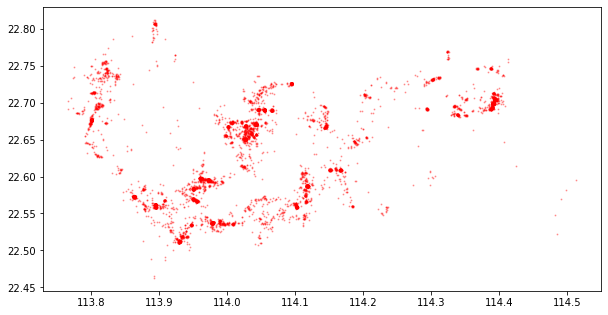

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.3)

In [81]:
df = pd.DataFrame(gdf.drop(columns=['geometry']))

In [88]:
df_list = [(pid, subdf) for pid, subdf in df.groupby('pid')]

In [91]:
for pid, subdf in df_list:
    subdf = subdf.rename(columns={'pid': 'who'})
    subdf.to_csv(f'./data/espace_juin_dataset/individual_data_{pid:09d}.csv', index=False)